In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [3]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print('Uploaded file "{name}" with length bytes'.format(name='Anaemia Prediction Dataset.csv', length=len(uploaded['Anaemia Prediction Dataset.csv'])))

Saving Anaemia Prediction Dataset.csv to Anaemia Prediction Dataset.csv
Uploaded file "Anaemia Prediction Dataset.csv" with length bytes


In [4]:
data = pd.read_csv('Anaemia Prediction Dataset.csv', sep=",")

In [6]:
data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.97,28.36,26.41,5.15,Yes
1,2,F,44.01,29.22,27.33,7.97,Yes
2,3,F,47.77,27.73,24.61,9.14,Yes
3,4,F,45.96,30.69,25.19,4.00,Yes
4,5,M,46.91,31.26,22.21,9.90,Yes
...,...,...,...,...,...,...,...
495,496,F,44.87,27.52,26.57,14.19,No
496,497,F,44.85,28.20,24.44,11.94,No
497,498,F,42.27,31.57,27.37,11.69,No
498,499,F,43.22,29.57,26.45,13.53,No


In [7]:
data = data.drop(columns='Number')
data

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.97,28.36,26.41,5.15,Yes
1,F,44.01,29.22,27.33,7.97,Yes
2,F,47.77,27.73,24.61,9.14,Yes
3,F,45.96,30.69,25.19,4.00,Yes
4,M,46.91,31.26,22.21,9.90,Yes
...,...,...,...,...,...,...
495,F,44.87,27.52,26.57,14.19,No
496,F,44.85,28.20,24.44,11.94,No
497,F,42.27,31.57,27.37,11.69,No
498,F,43.22,29.57,26.45,13.53,No


In [9]:
data.Sex

0       M
1       F
2       F
3       F
4      M 
       ..
495     F
496     F
497    F 
498     F
499    F 
Name: Sex, Length: 500, dtype: object

In [10]:
data.Sex.unique()

array(['M', 'F', 'M ', 'F '], dtype=object)

In [11]:
data['Sex'] = data['Sex'].map({'F': 0, 'F ': 0, 'M': 1, 'M ': 1})

In [12]:
data.Sex.unique()

array([1, 0])

In [13]:
data.Anaemic.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['Anaemic'] = data['Anaemic'].map({'Yes': 1, 'No': 0})

In [17]:
data.dtypes

Sex               int64
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic           int64
dtype: object

## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Number of Male and Female')

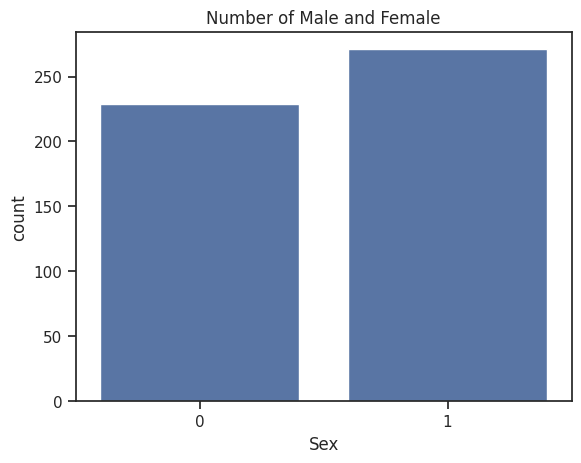

In [19]:
gender_count = data.Sex.value_counts() # data['Sex'].value_counts()
sns.barplot(data = data, x = 'Sex', y = gender_count)
plt.title('Number of Male and Female')

Text(0.5, 1.0, 'Distribution of Hemoglobin levels')

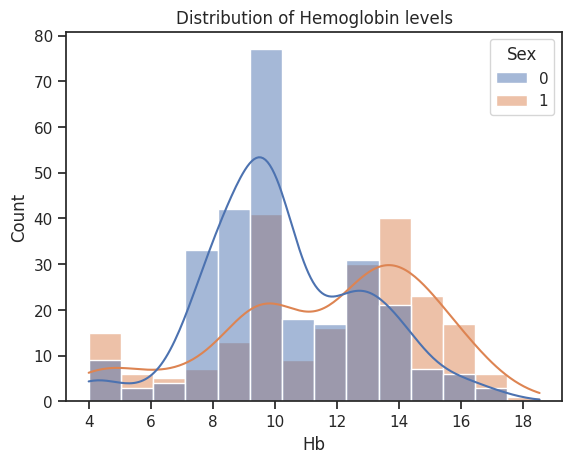

In [20]:
sns.histplot(data=data, x='Hb', hue='Sex', kde=True)
plt.title("Distribution of Hemoglobin levels")

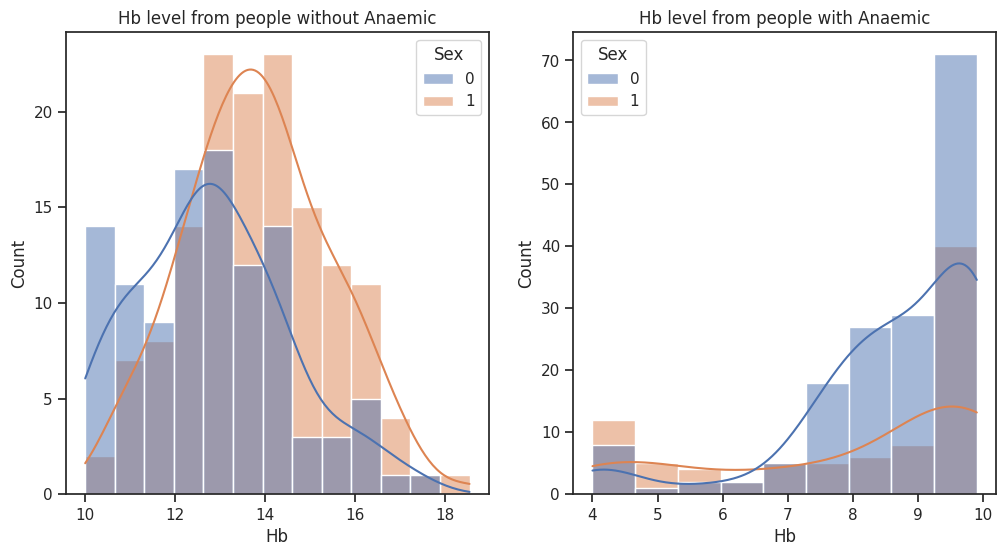

In [21]:
anaemic_data = data[data['Anaemic'] == 1]
not_anaemic_data = data[data['Anaemic'] == 0]

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(data=not_anaemic_data, x='Hb', hue='Sex', kde=True)
plt.title('Hb level from people without Anaemic')

plt.subplot(1,2,2)
sns.histplot(data=anaemic_data, x='Hb', hue='Sex', kde=True)
plt.title('Hb level from people with Anaemic')
plt.show()

people who didn't diagnose with anaemic have higher Hemoglobin level than people who diagnose with Anaemic.

<Axes: >

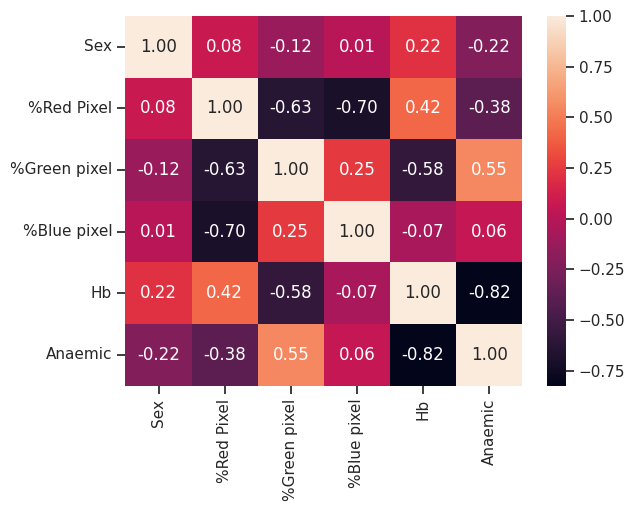

In [23]:
corr = data.corr()

sns.heatmap(corr, fmt='.2f', annot=True)

## Split Dataset

In [24]:
X = data.drop(columns='Anaemic')
y = data['Anaemic']

In [25]:
X.shape, y.shape

((500, 5), (500,))

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define the Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Model name: RF
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



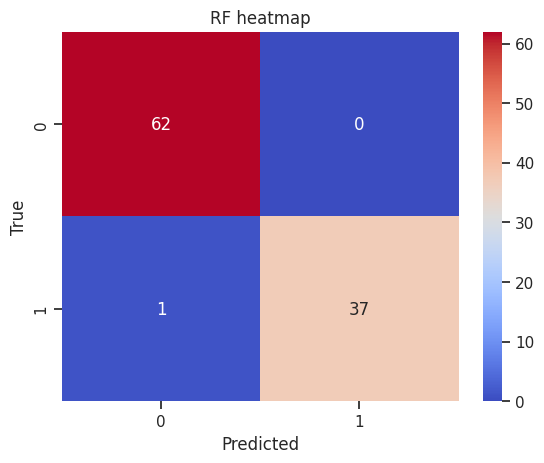

Model name: DT
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        37

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



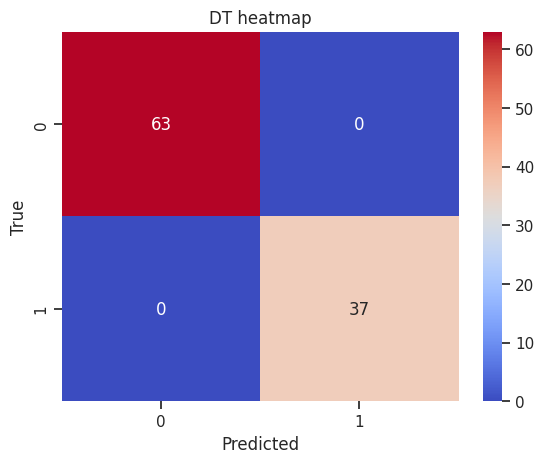

Model name: LogR
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        39

    accuracy                           0.98       100
   macro avg       0.98      0.97      0.98       100
weighted avg       0.98      0.98      0.98       100



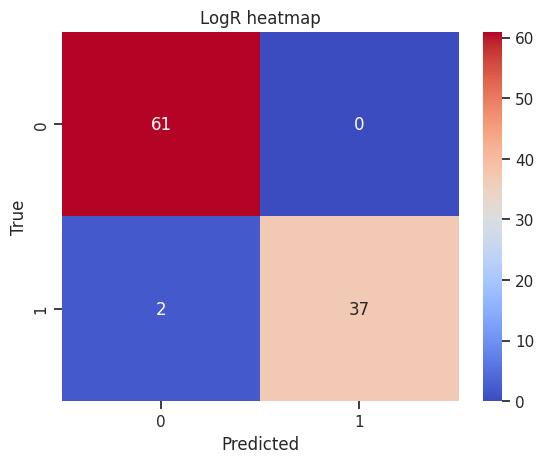

In [30]:
models = {
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'LogR': LogisticRegression()
}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_pred, y_test)
  print(f"Model name: {model_name}\nAccuracy: {accuracy}\n{classification_report(y_pred, y_test)}")

  cm = confusion_matrix(y_pred, y_test)
  sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f"{model_name} heatmap")
  plt.show()
